# N-grams

In [2]:
#   https://github.com/martin-majlis/Wikipedia-API
import wikipediaapi

wiki_wiki = wikipediaapi.Wikipedia('en')

page = wiki_wiki.page('Natural language processing')
print(page.text)

Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.  The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.
Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.

History
Natural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not a

In [3]:
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
stop_words_en = stopwords.words("english")
import string
punctation = list(string.punctuation)
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer

nltk_word_para = word_tokenize(page.summary, language="english", preserve_line=False)

nltk_word_para

['Natural',
 'language',
 'processing',
 '(',
 'NLP',
 ')',
 'is',
 'a',
 'subfield',
 'of',
 'linguistics',
 ',',
 'computer',
 'science',
 ',',
 'and',
 'artificial',
 'intelligence',
 'concerned',
 'with',
 'the',
 'interactions',
 'between',
 'computers',
 'and',
 'human',
 'language',
 ',',
 'in',
 'particular',
 'how',
 'to',
 'program',
 'computers',
 'to',
 'process',
 'and',
 'analyze',
 'large',
 'amounts',
 'of',
 'natural',
 'language',
 'data',
 '.',
 'The',
 'goal',
 'is',
 'a',
 'computer',
 'capable',
 'of',
 '``',
 'understanding',
 "''",
 'the',
 'contents',
 'of',
 'documents',
 ',',
 'including',
 'the',
 'contextual',
 'nuances',
 'of',
 'the',
 'language',
 'within',
 'them',
 '.',
 'The',
 'technology',
 'can',
 'then',
 'accurately',
 'extract',
 'information',
 'and',
 'insights',
 'contained',
 'in',
 'the',
 'documents',
 'as',
 'well',
 'as',
 'categorize',
 'and',
 'organize',
 'the',
 'documents',
 'themselves',
 '.',
 'Challenges',
 'in',
 'natural',
 'la

In [4]:
def Ngrams_generator(text,ngram=1,isLemma=True):
  words=[unidecode(word).lower() for word in word_tokenize(text, language="english", preserve_line=True) if (word not in stop_words_en)and(word not in punctation) and (word.isalpha())]
  if isLemma:
    lemma = WordNetLemmatizer()
    words=[lemma.lemmatize(w) for w in words]
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

print("UNIGRAMS")
unigram = Ngrams_generator(page.summary, 1)
print(unigram)
print("BIGRAMS")
bigram = Ngrams_generator(page.summary, 2)
print(bigram)
print("TRIGRAMS")
trigram = Ngrams_generator(page.summary, 3)
print(trigram)


UNIGRAMS
['natural', 'language', 'processing', 'nlp', 'subfield', 'linguistics', 'computer', 'science', 'artificial', 'intelligence', 'concerned', 'interaction', 'computer', 'human', 'language', 'particular', 'program', 'computer', 'process', 'analyze', 'large', 'amount', 'natural', 'language', 'the', 'goal', 'computer', 'capable', 'understanding', 'content', 'document', 'including', 'contextual', 'nuance', 'language', 'within', 'the', 'technology', 'accurately', 'extract', 'information', 'insight', 'contained', 'document', 'well', 'categorize', 'organize', 'document', 'challenge', 'natural', 'language', 'processing', 'frequently', 'involve', 'speech', 'recognition', 'natural', 'language', 'understanding', 'natural', 'language', 'generation']
BIGRAMS
['natural language', 'language processing', 'processing nlp', 'nlp subfield', 'subfield linguistics', 'linguistics computer', 'computer science', 'science artificial', 'artificial intelligence', 'intelligence concerned', 'concerned interac

In [5]:
import pyodbc
import pandas as pd
import pickle

#   conn_str = (
#               "DRIVER={PostgreSQL ODBC Driver(UNICODE)};"
#               "SERVER=localhost;"
#               "DATABASE=NLP;"
#               "UID=postgres;"
#               "PWD=postgres;"
#               "PORT=5432;"
#               )
#   pyodbcConn = pyodbc.connect(conn_str)

In [6]:
#   positiveComments = pd.read_sql_query(
#                   f"""
#                   SELECT comment
#                   FROM public.bgg_bgg_15m_reviews
#                   WHERE cast(rating as real)>=10
#                       and comment !='NaN'
#                   LIMIT 1000;
#                   """
#                   , pyodbcConn, index_col=None, coerce_float=True, params=None, parse_dates=None, chunksize=None)
#   
#   positiveComments.to_pickle('positiveComments.pickle')
#   positiveComments

In [7]:
#   negativeComments = pd.read_sql_query(
#                   f"""
#                   SELECT comment
#                   FROM public.bgg_bgg_15m_reviews
#                   WHERE cast(rating as real)<=1
#                       and comment !='NaN'
#                   LIMIT 1000;
#                   """
#                   , pyodbcConn, index_col=None, coerce_float=True, params=None, parse_dates=None, chunksize=None)
#   
#   negativeComments.to_pickle('negativeComments.pickle')
#   negativeComments

In [8]:
positiveComments = pd.read_pickle('positiveComments.pickle')
print(positiveComments.head())

negativeComments = pd.read_pickle('negativeComments.pickle')
print(negativeComments.head())

                                             comment
0  Best investigation game out there!!! Best arkh...
1  When I got arkham horror years ago, i played a...
2  I really have no words for this game, it has e...
3                                           Englisch
4  Great game! Blends Roleplaying, Exploration, R...
                                             comment
0  Keep your deeply misguided political thoughts ...
1  STAY AWAY ... this is one of those games that ...
2  Stay away. I warned you. You'll have more fun ...
3  Absolutely worst experience I had with any tab...
4  Game is fun.  Till you realize there is a stra...


In [9]:
from nltk.tokenize import word_tokenize
import string
punct = string.punctuation
from nltk.corpus import stopwords
stop_words_en = stopwords.words("english")
from unidecode import unidecode

def removePunctStopWord(sentence):
    nltk_word = word_tokenize(sentence)
    cleanedList = [unidecode(w.lower()) 
                    for w in nltk_word 
                        if (w not in list(string.punctuation)) 
                            and (w not in stop_words_en)]
    cleanedSentence = ' '.join(cleanedList)
    return(cleanedSentence)

positiveComments['comment'] = positiveComments['comment'].apply(lambda x:removePunctStopWord(x))
negativeComments['comment'] = negativeComments['comment'].apply(lambda x:removePunctStopWord(x))

print(positiveComments.head())
print(negativeComments.head())

                                             comment
0  best investigation game best arkham themed gam...
1  when i got arkham horror years ago played play...
2  i really words game everything looking compone...
3                                           englisch
4  great game blends roleplaying exploration reso...
                                             comment
0    keep deeply misguided political thoughts whedon
1  stay away ... one games ranked high licence id...
2  stay away i warned you 'll fun watching paint ...
3  absolutely worst experience i tabletop game bo...
4  game fun till realize strategy break game so d...


In [10]:
from collections import defaultdict

positiveValues = defaultdict(int)
negativeValues = defaultdict(int)

#get the count of every word in the positive dataframe
for text in positiveComments.comment:
  for word in Ngrams_generator(text):
    positiveValues[word]+=1

#get the count of every word in the positive dataframe
for text in negativeComments.comment:
  for word in Ngrams_generator(text):
    negativeValues[word]+=1

negativeValues

defaultdict(int,
            {'keep': 13,
             'deeply': 3,
             'misguided': 2,
             'political': 1,
             'thought': 13,
             'whedon': 1,
             'stay': 12,
             'away': 25,
             'one': 175,
             'game': 1291,
             'ranked': 6,
             'high': 23,
             'licence': 2,
             'idea': 25,
             'top': 19,
             'think': 41,
             'le': 49,
             'boring': 85,
             'hell': 13,
             'need': 35,
             'play': 296,
             'random': 42,
             'amerithrash': 1,
             'hour': 61,
             'nothing': 43,
             'new': 16,
             'mechanic': 52,
             'innovation': 2,
             'ton': 3,
             'card': 145,
             'basically': 25,
             'move': 32,
             'ship': 11,
             'end': 39,
             'board': 61,
             'far': 23,
             'worst': 59,
             'iv

In [11]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
print(df_positive.head())
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
print(df_negative.head())

pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

        0     1
0    game  1423
1    play   416
2  player   268
3     one   246
4     fun   223
        0     1
0    game  1291
1    play   296
2    like   210
3     one   175
4  player   158


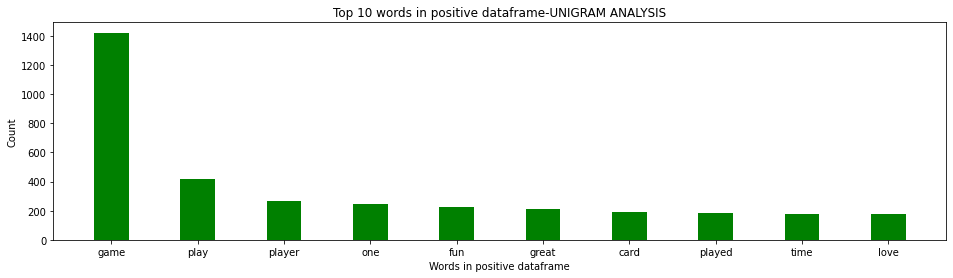

In [12]:
import matplotlib.pyplot as plt

plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

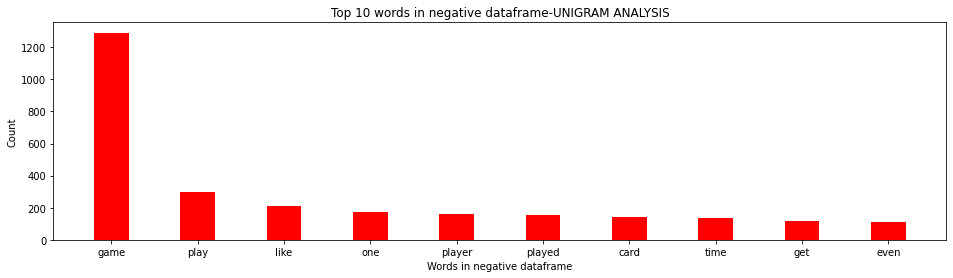

In [13]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

In [14]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)

for text in positiveComments.comment:
  for word in Ngrams_generator(text,2):
    positiveValues2[word]+=1

for text in negativeComments.comment:
  for word in Ngrams_generator(text,2):
    negativeValues2[word]+=1

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

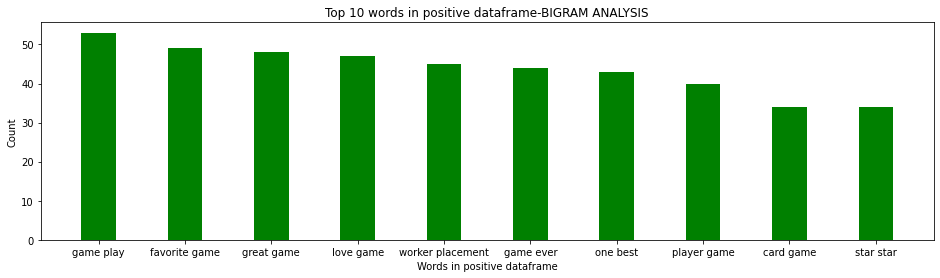

In [15]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")
plt.savefig("positive-bigram.png")
plt.show()

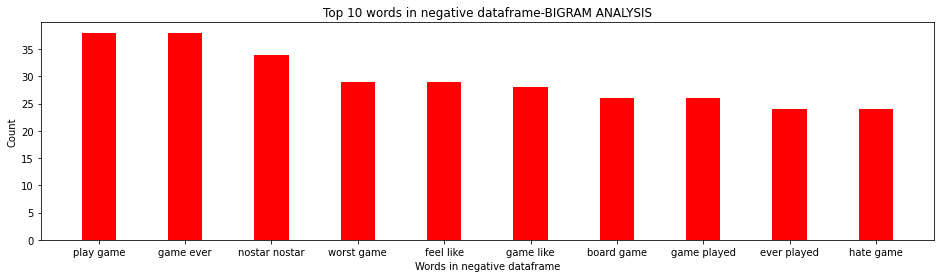

In [16]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

In [17]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)

for text in positiveComments.comment:
  for word in Ngrams_generator(text,3):
    positiveValues3[word]+=1

for text in negativeComments.comment:
  for word in Ngrams_generator(text,3):
    negativeValues3[word]+=1

df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

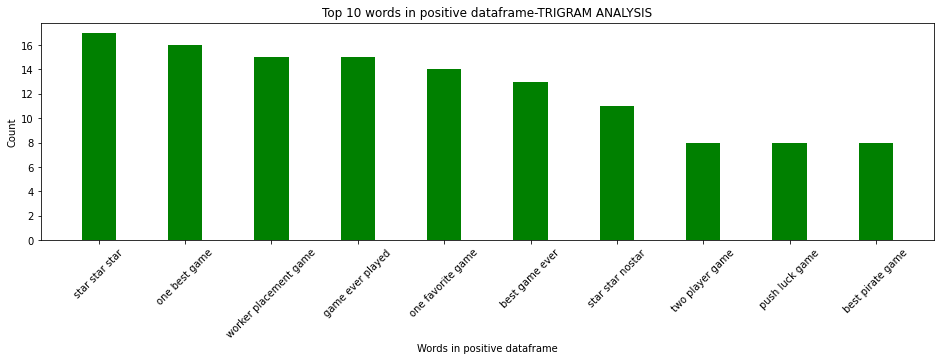

In [18]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xticks(rotation=45)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")
plt.show()

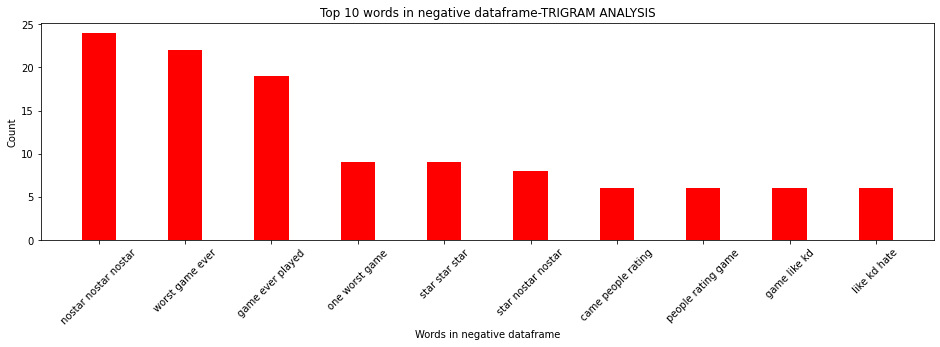

In [19]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4)
plt.xticks(rotation=45)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

# Skip-grams

In [20]:
import nltk
text = page.summary

words=[unidecode(word).lower() for word in word_tokenize(text, language="english", preserve_line=True) if (word not in stop_words_en)and(word not in punctation) and (word.isalpha())]
lemma = WordNetLemmatizer()
words=[lemma.lemmatize(w) for w in words]

list(nltk.skipgrams(words, 3, 2))

[('natural', 'language', 'processing'),
 ('natural', 'language', 'nlp'),
 ('natural', 'language', 'subfield'),
 ('natural', 'processing', 'nlp'),
 ('natural', 'processing', 'subfield'),
 ('natural', 'nlp', 'subfield'),
 ('language', 'processing', 'nlp'),
 ('language', 'processing', 'subfield'),
 ('language', 'processing', 'linguistics'),
 ('language', 'nlp', 'subfield'),
 ('language', 'nlp', 'linguistics'),
 ('language', 'subfield', 'linguistics'),
 ('processing', 'nlp', 'subfield'),
 ('processing', 'nlp', 'linguistics'),
 ('processing', 'nlp', 'computer'),
 ('processing', 'subfield', 'linguistics'),
 ('processing', 'subfield', 'computer'),
 ('processing', 'linguistics', 'computer'),
 ('nlp', 'subfield', 'linguistics'),
 ('nlp', 'subfield', 'computer'),
 ('nlp', 'subfield', 'science'),
 ('nlp', 'linguistics', 'computer'),
 ('nlp', 'linguistics', 'science'),
 ('nlp', 'computer', 'science'),
 ('subfield', 'linguistics', 'computer'),
 ('subfield', 'linguistics', 'science'),
 ('subfield', 